In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('../data/clean_data.csv', index_col=0)
df[df['original_language'] == 'eusk']

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,year,month,original_language
29,146406912,2022-11-30T15:55:35.000Z,1597982684487340040,guillerdorron rt bbk_eus 🤔 zer dira bbk eta th...,0,0,0,0,0,2022,11,eusk
36,702077405045899264,2022-11-30T09:33:32.000Z,1597886536896450562,🗣 tomás iriondo clustergaia -ko ceo #eteari la...,0,3,0,0,1,2022,11,eusk
38,702077405045899264,2022-11-30T09:09:45.000Z,1597880551578419201,🤔 zer dira bbk eta thebridge_tech -en #bbkboot...,0,4,0,0,2,2022,11,eusk
40,702077405045899264,2022-11-30T08:53:19.000Z,1597876414908432385,🗣 iker arcerekin thebridge_tech -eko ceo-a jar...,0,3,0,0,1,2022,11,eusk
42,702077405045899264,2022-11-30T08:43:35.000Z,1597873965812285440,🗣 nora sarasolak bbk-ko gizarte ekintzako zuze...,0,3,0,0,1,2022,11,eusk
46,702077405045899264,2022-11-30T08:13:41.000Z,1597866442841628672,🔛 aurkezpen eguna thebridge_tech eta #bbk -k i...,0,2,0,0,1,2022,11,eusk
58,702077405045899264,2022-11-22T08:05:10.000Z,1594965197613322241,ikasi gaur etorkizuneko lanbideak izena eman #...,0,2,0,0,1,2022,11,eusk


DATA PROCESSING

In [11]:
#TRANSLATION INTO SPA

In [14]:
#eliminar signos

import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\¡)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df['text'] = df['text'].apply(signs_tweets)
df['text'].head()

0    empieza año formándote profesiones 𝗱𝗲𝗺𝗮𝗻𝗱𝗮 𝗹𝗮𝗯...
1    bootcamps tecnológicos edem thebridge_tech emp...
2    edemempresarios acoge enero open day participa...
3    si buscando profesión cambie vida acércate ope...
4    thebridge_tech deseo ti💫 qué venga cargado éxi...
Name: text, dtype: object

In [15]:
#eliminar links

def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

df['text'] = df['text'].apply(remove_links)

In [16]:
#eliminar stopwords

from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])



In [18]:
df['text'] = df['text'].apply(remove_stopwords)

In [20]:
df.text.head()

0    empieza año formándote profesiones 𝗱𝗲𝗺𝗮𝗻𝗱𝗮 𝗹𝗮𝗯...
1    bootcamps tecnológicos edem thebridge_tech emp...
2    edemempresarios acoge enero open day participa...
3    si buscando profesión cambie vida acércate ope...
4    thebridge_tech deseo ti💫 venga cargado éxitos ...
Name: text, dtype: object

In [22]:
# Clean emojis 
import emoji 


df['text'] = df['text'].apply(lambda x: emoji.demojize(x))

In [40]:
df[df['original_language'] != 'es']['text']

13     libertariadora javieramaestre kilrau gabohbeau...
22     :light_bulb: interesante intervención ramón lo...
24     :BACK_arrow: atzo oso jardunaldi interesgarria...
29     guillerdorron rt bbk_eus :thinking_face: zer d...
31     guillerdorron rt bbk_eus #bbkbootcamps | :spea...
32     open day #bilbao conocer #bootcam :spiral_cale...
33     #bbkbootcamps | :speaking_head: guillermo dorr...
35     #bbkbootcamps | :speaking_head: ramón lozano d...
36     :speaking_head: tomás iriondo clustergaia -ko ...
38     :thinking_face: zer dira bbk eta thebridge_tec...
40     :speaking_head: iker arcerekin thebridge_tech ...
42     :speaking_head: nora sarasolak bbk-ko gizarte ...
44     :hot_beverage::croissant: jardunaldia enpresen...
46     :ON!_arrow: aurkezpen eguna thebridge_tech eta...
56     ven conocer bbk bootcamps powered by thebridge...
58     ikasi gaur etorkizuneko lanbideak izena eman #...
65            paumugarra tonidorta thebridge_tech {link}
68     rperezmarco bitcointuesd

In [42]:
'''#Because of 'translate' module memory problems we will use microsoft translation package'''

from translate import Translator

# Initialize translator object
translator = Translator(to_lang='es')

# Translate the 'text' column if 'original_language' is not 'es'
df['text_es'] = df.apply(lambda x: translator.translate(x['text']) if x['original_language'] != 'es' else x['text'], axis=1)

# Print the translated dataframe
print(df)


               author_id                created_at                   id  \
0    1151510939105144834  2022-12-29T16:39:19.000Z  1608502937332113408   
1              570795448  2022-12-29T12:52:11.000Z  1608445776732246017   
2             1128860148  2022-12-29T09:16:11.000Z  1608391421014196224   
3              570795448  2022-12-27T09:00:57.000Z  1607662809575292929   
4    1162694149956603904  2022-12-23T12:54:06.000Z  1606271930763354112   
..                   ...                       ...                  ...   
144            271028835  2023-01-07T19:55:52.000Z  1611813891322908672   
145  1530194743786881024  2023-01-06T12:28:27.000Z  1611338908196913153   
146             10279282  2023-01-04T15:02:11.000Z  1610652818234347521   
147           2402179123  2023-01-04T11:57:41.000Z  1610606391445815297   
148   874916978665938945  2023-01-02T15:15:00.000Z  1609931268921114627   

                                                  text  impression_count  \
0    empieza año formán

In [49]:
df['text_es'][29]

'MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  22 HOURS 49 MINUTES 56 SECONDS VISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE'

In [50]:
from mtranslate import translate

# Define la función de traducción
def translate_text(row):
    # Traduce el texto a español
    return translate(row['text'], 'es')

# Aplica la función de traducción a la columna 'text'
df['text_es'] = df.apply(translate_text, axis=1)



               author_id                created_at                   id  \
0    1151510939105144834  2022-12-29T16:39:19.000Z  1608502937332113408   
1              570795448  2022-12-29T12:52:11.000Z  1608445776732246017   
2             1128860148  2022-12-29T09:16:11.000Z  1608391421014196224   
3              570795448  2022-12-27T09:00:57.000Z  1607662809575292929   
4    1162694149956603904  2022-12-23T12:54:06.000Z  1606271930763354112   
..                   ...                       ...                  ...   
144            271028835  2023-01-07T19:55:52.000Z  1611813891322908672   
145  1530194743786881024  2023-01-06T12:28:27.000Z  1611338908196913153   
146             10279282  2023-01-04T15:02:11.000Z  1610652818234347521   
147           2402179123  2023-01-04T11:57:41.000Z  1610606391445815297   
148   874916978665938945  2023-01-02T15:15:00.000Z  1609931268921114627   

                                                  text  impression_count  \
0    empieza año formán

In [52]:
df[df['original_language'] != 'es'].head()

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,year,month,original_language,text_es
13,1530194743786881024,2022-12-13T18:53:22.000Z,1602738464902250497,libertariadora javieramaestre kilrau gabohbeau...,0,2,0,0,0,2022,12,en,libertariadora javieramaestre kilrau gabohbeau...
22,108885393,2022-12-02T08:40:07.000Z,1598597870797688833,:light_bulb: interesante intervención ramón lo...,0,4,0,0,1,2022,12,it,:light_bulb: interesante intervención ramón lo...
24,702077405045899264,2022-12-01T16:01:03.000Z,1598346448138956801,:BACK_arrow: atzo oso jardunaldi interesgarria...,0,0,0,0,0,2022,12,nl,:BACK_arrow: Tuvimos un día muy interesante ay...
29,146406912,2022-11-30T15:55:35.000Z,1597982684487340040,guillerdorron rt bbk_eus :thinking_face: zer d...,0,0,0,0,0,2022,11,eusk,guillerdorron rt bbk_eus :thinking_face: what ...
31,146406912,2022-11-30T15:55:34.000Z,1597982677675778048,guillerdorron rt bbk_eus #bbkbootcamps | :spea...,0,0,0,0,0,2022,11,en,guillerdorron rt bbk_eus #bbkbootcamps | :habl...
32,1951117790,2022-11-30T12:39:00.000Z,1597933210767433732,open day #bilbao conocer #bootcam :spiral_cale...,0,9,0,0,5,2022,11,en,jornada de puertas abiertas #bilbao conocer #b...
33,702077405045899264,2022-11-30T09:45:27.000Z,1597889537627283456,#bbkbootcamps | :speaking_head: guillermo dorr...,0,5,3,0,3,2022,11,en,#bbkbootcamps | :hablando_cabeza: guillermo do...
35,702077405045899264,2022-11-30T09:43:54.000Z,1597889145497653249,#bbkbootcamps | :speaking_head: ramón lozano d...,0,4,1,0,2,2022,11,en,#bbkbootcamps | :hablando_cabeza: ramón lozano...
36,702077405045899264,2022-11-30T09:33:32.000Z,1597886536896450562,:speaking_head: tomás iriondo clustergaia -ko ...,0,3,0,0,1,2022,11,eusk,:hablando_cabeza: tomás iriondo clustergaia ce...
38,702077405045899264,2022-11-30T09:09:45.000Z,1597880551578419201,:thinking_face: zer dira bbk eta thebridge_tec...,0,4,0,0,2,2022,11,eusk,:thinking_face: qué son los #bbkbootcamps de b...


In [ ]:
#Con todo en el mismo idioma, podemos aplicar un stemmer

In [53]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df['text_es'] = df['text_es'].apply(spanish_stemmer)
df['text_es'].head()

0    empiez año formandot profesion 𝗱𝗲𝗺𝗮𝗻𝗱𝗮 𝗹𝗮𝗯𝗼𝗿𝗮𝗹...
1    bootcamps tecnolog edem thebridge_tech emple d...
2    edemempresari acog ener open day particip resp...
3    si busc profesion cambi vid acercat open day p...
4    thebridge_tech dese ti:dizzy: veng carg exit f...
Name: text_es, dtype: object


# PREDICCIONES

In [54]:
import pickle
with open('../models/sentiment_model', "rb") as archivo_entrada:
    model_pretrained = pickle.load(archivo_entrada)

In [55]:
model_pretrained

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [ ]:
#gptJRO

# Cargar el modelo preentrenado
with open('model_pretrained.pkl', 'rb') as f:
    model = pickle.load(f)

# Crear una función para predecir la polaridad
def predict_sentiment(text):
    return model.predict([text])[0]

# Aplicar la función predict_sentiment() a la columna 'text_es' y agregar los resultados como una nueva columna 'polarity'
df['polarity'] = df['text_es'].apply(predict_sentiment)

# Imprimir el DataFrame resultante
print(df)


In [61]:
predictions = model_pretrained.predict(df['text_es'])
df['polarity'] = pd.DataFrame(predictions)


,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,year,month,original_language,text_es,polarity
0,1151510939105144834,2022-12-29T16:39:19.000Z,1608502937332113408,empieza año formándote profesiones 𝗱𝗲𝗺𝗮𝗻𝗱𝗮 𝗹𝗮𝗯...,113,4,0,0,1,2022,12,es,empiez año formandot profesion 𝗱𝗲𝗺𝗮𝗻𝗱𝗮 𝗹𝗮𝗯𝗼𝗿𝗮𝗹...,1
1,570795448,2022-12-29T12:52:11.000Z,1608445776732246017,bootcamps tecnológicos edem thebridge_tech emp...,124,2,0,0,0,2022,12,es,bootcamps tecnolog edem thebridge_tech emple d...,0
2,1128860148,2022-12-29T09:16:11.000Z,1608391421014196224,edemempresarios acoge enero open day participa...,49,2,0,0,0,2022,12,es,edemempresari acog ener open day particip resp...,0
3,570795448,2022-12-27T09:00:57.000Z,1607662809575292929,si buscando profesión cambie vida acércate ope...,218,5,0,0,0,2022,12,es,si busc profesion cambi vid acercat open day p...,0
4,1162694149956603904,2022-12-23T12:54:06.000Z,1606271930763354112,thebridge_tech deseo ti:dizzy: venga cargado é...,120,1,0,0,1,2022,12,es,thebridge_tech dese ti:dizzy: veng carg exit f...,0


In [80]:
import seaborn as sns

<AxesSubplot:xlabel='polarity', ylabel='count'>

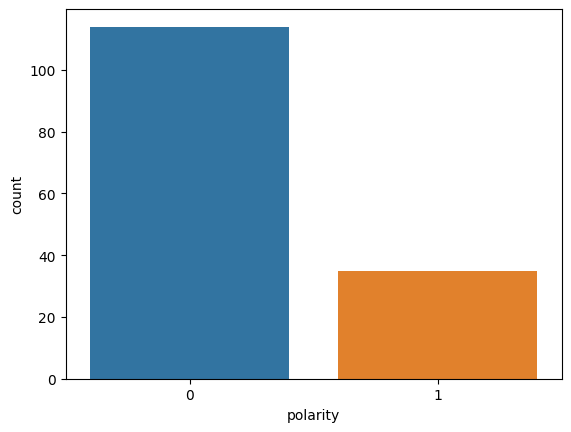

In [83]:
sns.countplot(df, x='polarity')

4B - VARIABLES MAS IMPORTANTES DEL MODELO

In [77]:
import numpy as np

# Get the CountVectorizer step from the pipeline
vect_step = model_pretrained['vect']

# Get the LogisticRegression step from the pipeline
lr_step = model_pretrained['cls']

# Get the vocabulary from the CountVectorizer step
vocab = vect_step.get_feature_names()

# Get the coefficients from the LogisticRegression model
coefs = lr_step.coef_[0]

# Create a list of tuples with the feature names and coefficients
feat_coef = list(zip(vocab, coefs))

# Sort the list by absolute value of coefficient in descending order
feat_coef_sorted = sorted(feat_coef, key=lambda x: np.abs(x[1]), reverse=True)

# Print the top 10 most important features
for i in range(10):
    print(feat_coef_sorted[i])



('encant', -1.8605111981502893)
('enhorabuen', -1.8449366081495842)
('graci', -1.805329609096349)
('buen', -1.6751185631684895)
('feliz', -1.4730851687952473)
('bes', -1.459032652806634)
('cuent', 1.427233666085361)
('deficit', 1.4022058325629765)
('blanc', 1.368604445686843)
('muert', 1.3502570413482133)


c:\Users\rivas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [78]:
model_pretrained

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

4C - MEJORAR EL MODELO: 

- better data cleaning
- aumentar muestra
- hiperparametrizar diferente
- mas modelos (aunque una Logisticregression suele ser una buena idea para los analisis de sentimiento hay otras opciones que pueden ser consideradas como un LinearSVC (mejor con outliers pero no tan interpretable) o un Naive Bayes)

4D 
 - analizar el impacto campaña resultado
 - 